<a href="https://colab.research.google.com/github/AidanJIC/Clasificaci-n-de-productos-en-supermercados-utilizando-visi-n-computacional/blob/main/Practica_03_MetodoWelch_Ventaneo_Espectrograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)

**Programa de ingenieria Mecatrónica**
# **PROCESAMIENTO DIGITAL DE SEÑALES**
`Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

`Ciclo 2020-II`

## **Practica 7: Metodo de Welch y Escpetrograma**

#### **Librerias a utilizar**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io as sio
plt.style.use(['dark_background']) #Para gráficas para temas oscuros.

###**7.1. Método de Welch**

Este método incrementa la disminución del ruido, a comparacion de la FFT estática (FTT de toda la señal), en señales no estacionarias, es decir, señales que cambian levemente sus características a lo largo del tiempo.


El método de Welch a diferencia de la FFT estática, toma ventanas (secciones de la señal), calcula la FFT y finalmente promedia los espectros obtenidos. Se da el caso entonces que si la señal no tiene variaciones en sus características a lo largo del tiempo (señal estacionaria), ambos métodos, tanto Welch como la FFT darán los mismos resultados. Se debe tener en cuenta que las ventanas en el método de Welch se pueden superponer.

<img src="https://i.ibb.co/rwv2NZs/Welch-method.png" alt="Welch-method" border="0" width=800 height=350>

#### **7.1.1. Implementación algorítmica del meteodo de Welch**

Los datos que usaremos son de un EEG de un paciente en estado de relajación. En el que se observa cierta periodicidad. Se buscará analizar con el método de Welch si dicha señal tiene alguna característica en frecuencia notable.

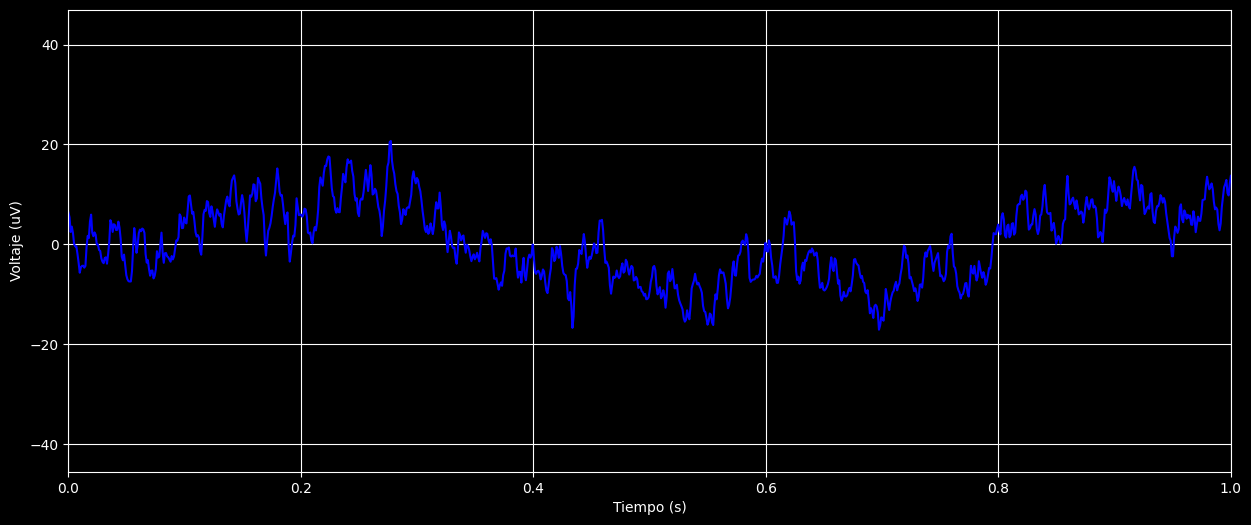

In [12]:
datos = sio.loadmat('EEGrestingState.mat') # Cargar los datos
eeg = datos['eegdata'][0] # Datos del EEG
fs = datos['srate'][0] # Frecuencia de muestreo

N = len(eeg) # Tamaño de la señal
t = np.arange(0,N)/fs # Vector temporal escalado

# Graficando resultados
plt.figure(figsize=(15,6))
plt.plot(t,eeg,'b')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (uV)')
plt.xlim(0,1)
plt.grid()
plt.show()


In [13]:
# Cálculo de la FFT estatica (de toda la señal) para comparación.
espectro_eeg2 = np.abs(np.fft.fft(eeg)/N)**2  # Espectro de potencia.
hz = np.linspace(0, fs/2, int(np.floor(N/2) + 1))  # Vector frecuencias - Hasta la frecuencia de Nyquist.


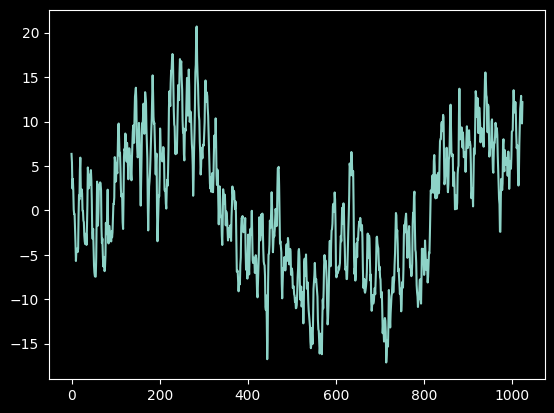

In [18]:
plt.plot(eeg[0:1024])

<ipython-input-19-4969a7e551a7>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n_ventana = int( 1*fs ) # Establecemos el tamaño de la ventana a usar,
<ipython-input-19-4969a7e551a7>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  inicios_ventanas = np.arange(0, int(N-n_ventana), int(n_superposicion)) # Tiempo de inicio de las ventanas.


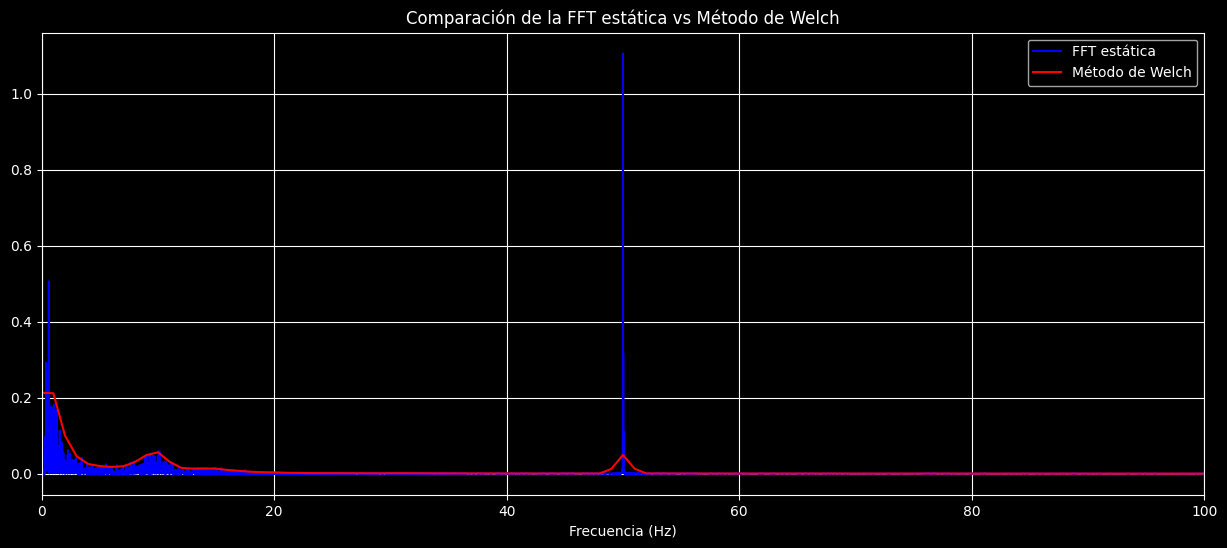

In [19]:
n_ventana = int( 1*fs ) # Establecemos el tamaño de la ventana a usar,
# recordemos que la señal tiene una longitud de 2 minutos.

n_superposicion = np.round(fs/2) # Tamaño de la superposición, se fija en la mitad del tamaño de la ventana.

inicios_ventanas = np.arange(0, int(N-n_ventana), int(n_superposicion)) # Tiempo de inicio de las ventanas.

hzV = np.linspace(0, fs/2, int(np.floor(n_ventana/2) + 1)) # Se calcula el vector frecuencias. Este vector tendrá
# una resolución distinta al de la FFT estática.

ventana_hanning = 0.5 - np.cos(2*np.pi*np.linspace(0, 1, int(n_ventana)))/2 # Creamos una ventana hanning.

espectro_eeg2_ventana = np.zeros(len(hzV)) # Inicializamos el vector para el espectro del metodo de Welch.

# Almacenamos los espectros de las ventanas.
for wi in range(0, len(inicios_ventanas)):
    segmento = eeg[inicios_ventanas[wi]:inicios_ventanas[wi]+n_ventana] # Obtenemos el segmento de señal que pertenece a la ventana.
    segmento = segmento * ventana_hanning # Aplicar la ventana hanning al segmento.
    espectro_segmento = np.abs(np.fft.fft(segmento)/n_ventana)**2 # Calculamos el espectro de potencia del segmento.
    espectro_eeg2_ventana = espectro_eeg2_ventana + espectro_segmento[0:len(hzV)] # Acumulamos los espectros de los segmentos.
espectro_eeg2_ventana = espectro_eeg2_ventana / len(inicios_ventanas) # Sacamos el promedio de los espectros acumulados

# Graficando resultados
plt.figure(figsize=(15,6))
plt.plot(hz,espectro_eeg2[0:len(hz)], 'b', label='FFT estática')
plt.plot(hzV,espectro_eeg2_ventana/10, 'r', label='Método de Welch')
plt.title('Comparación de la FFT estática vs Método de Welch')
plt.xlim([0,100])
plt.xlabel('Frecuencia (Hz)')
plt.legend()
# plt.yscale('log')
plt.grid()
plt.show()

#### **7.1.2. Método de Welch con Python**

Cuando queremos analizar todas las caracteristicas frecuenciales de la señal a lo largo del tiempo el espectrograma es una opcion visual viable.

<ipython-input-21-712f06e340d5>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n_ventana = int(2*fs) # Establecemos el tamaño de la ventana


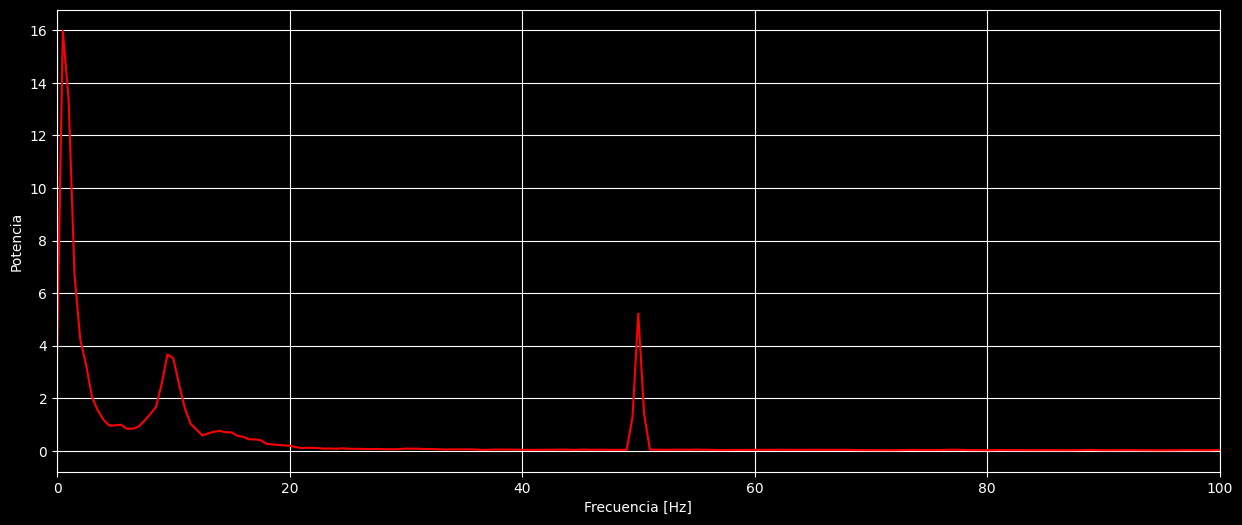

In [21]:
n_ventana = int(2*fs) # Establecemos el tamaño de la ventana
ventana_hanning = 0.5 - np.cos(2*np.pi*np.linspace(0, 1, n_ventana))/2 # Ventana Hanning

nfft = fs*2 # Número de puntos de la FFT (Aumentamos la resolución)

f, espectro_welch = signal.welch(eeg, fs=fs, window=ventana_hanning, nperseg=n_ventana, noverlap=n_ventana/4, nfft=nfft)

plt.figure(figsize=(15,6))
plt.plot(f, espectro_welch, 'r')
plt.xlim([0,100])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia')
plt.grid()
plt.show()


## **7.2. Espectrograma**

In [25]:
from scipy.io.wavfile import read
from IPython.display import Audio
Audio("XC403881.wav")  # Obtenido de https://www.xeno-canto.org/403881

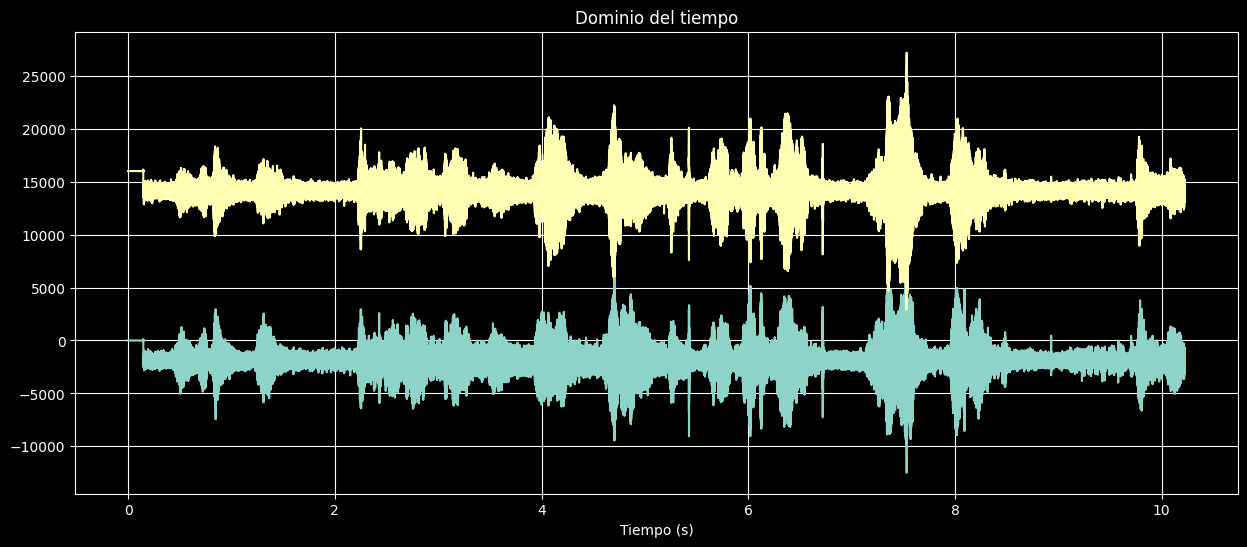

In [26]:
# Cargar archivo de música
fs, canto = read('XC403881.wav')

# Copiar el vector, ya que el leído es de solo lectura
canto2 = canto.copy()

# Longitud de la señal
n = len(canto2)

# Vector temporal
t = np.arange(0, n) / fs

# Agregar un offset al canal 1 solo para fines de visualización
canto2[:, 1] += 16000

# Graficar la señal
plt.figure(figsize=(15, 6))
plt.plot(t, canto2)
plt.xlabel('Tiempo (s)')
plt.title('Dominio del tiempo')
plt.grid()
plt.show()


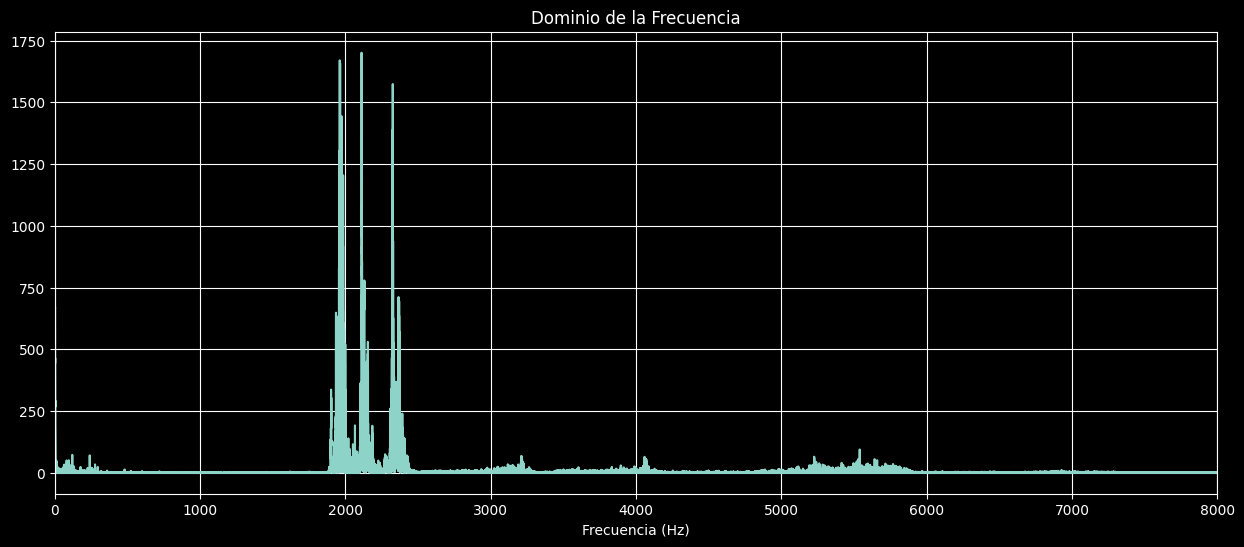

In [27]:
# Calculo el espectro de potencia de la señal
hz = np.linspace(0, fs/2, int(np.floor(n/2) + 1))
espectro_canto2 = np.abs(np.fft.fft(signal.detrend(canto2[:,0])/n))**2

# Grafico los resultados
plt.figure(figsize=(15,6))
plt.plot(hz, espectro_canto2[0:len(hz)])
plt.xlabel('Frecuencia (Hz)')
plt.title('Dominio de la Frecuencia')
plt.xlim([0,8000])
plt.grid()
plt.show()


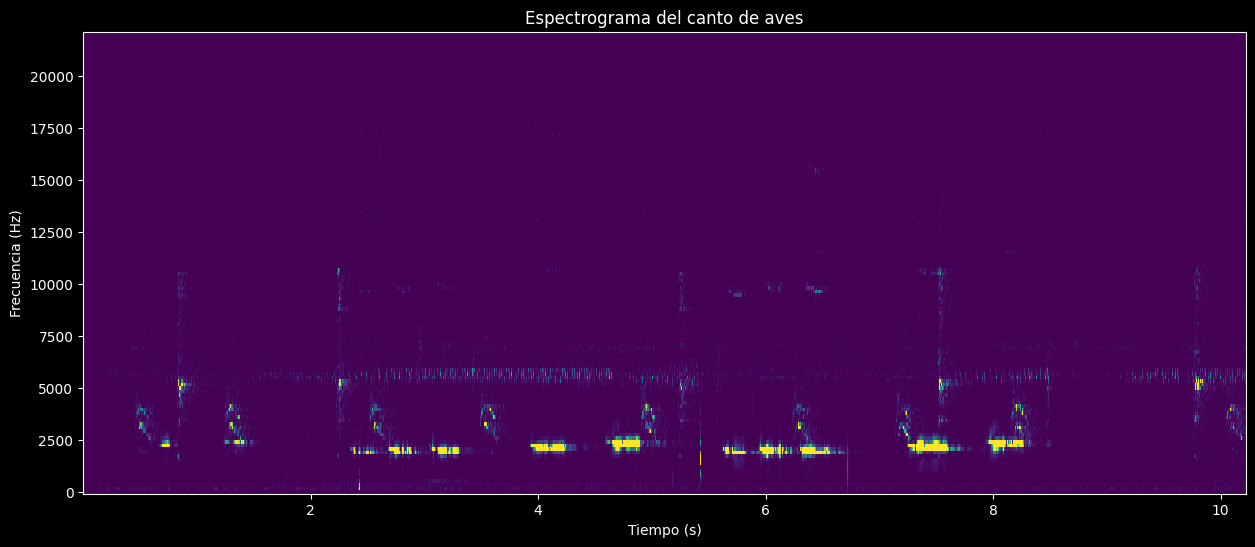

In [28]:
hz, t, espectro = signal.spectrogram(canto2[:,0], fs)  # Cálculo del espectrograma

plt.figure(figsize=(15, 6))
plt.pcolormesh(t, hz, espectro, vmin=0, vmax=3000)
plt.xlabel('Tiempo (s)'), plt.ylabel('Frecuencia (Hz)')
plt.title('Espectrograma del canto de aves')
# plt.grid()
plt.show()


In [29]:
Audio("XC403881.wav")  # Obtenido de https://www.xeno-canto.org/403881